### Video Demonstration: ###
#### Analyzing Hearrates Using Data Science Tools ####

Step One: Import the required Python Modules. We are importing three useful Data Science libraries:
1. numpy for array based statistical analysis
1. the University of Californina at Berkeley datasciene module for Table operations only
1. the pandas Python library
1. matplotlib for generating graphs quickly and with a minimum learning curve

In [45]:
import numpy as np
from datascience import Table
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Step Two: Import our two AppleWatch heartrate data sets the Cal Berkeley datascience Table Python class. Make sure your file path is correct.

In [46]:
heartrate_male_60 = Table.read_table('heartrate-male60.csv')
heartrate_female_54 = Table.read_table('heartrate-female54.csv')

Step Three: Let's perform some basic exploratory data analysis on these two data sets.

In [35]:
heartrate_male_60

timestamp,heartrate
2020-10-01 20:42:22 -0400,99
2020-10-01 20:47:46 -0400,67
2020-10-01 20:50:14 -0400,107
2020-10-01 20:50:19 -0400,107
2020-10-01 20:57:39 -0400,63
2020-10-01 21:02:07 -0400,57
2020-10-01 21:05:08 -0400,67
2020-10-01 21:11:29 -0400,77
2020-10-01 21:16:27 -0400,70
2020-10-01 21:20:14 -0400,74


Notice that this AppleWatch generated table is a simple two column table including a timestamp and a hearrate. However, the dataset includes 32,000+ rows. Notice that the starting time stamp is Oct 1st, 2020. Let's see what the last timestamps are using the same square bracket notation we would use to view the last rows of a standard Python list.

In [36]:
heartrate_male_60.take[-10:]

timestamp,heartrate
2021-06-22 13:47:02 -0400,64
2021-06-22 13:54:49 -0400,62
2021-06-22 14:01:05 -0400,58
2021-06-22 13:56:42 -0400,72
2021-06-22 14:06:19 -0400,78
2021-06-22 14:01:35 -0400,72
2021-06-22 14:07:26 -0400,60
2021-06-22 14:12:03 -0400,77
2021-06-22 14:19:09 -0400,69
2021-06-22 14:23:54 -0400,56


Notice the last timestamp is June 22nd 2021. Now, let's do the same with the heartrate_female_54 data set.

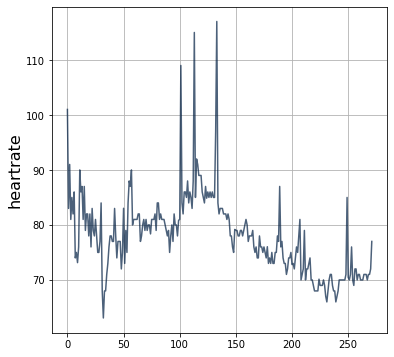

In [114]:
## heartrate_female_54
import re
hr2hrs=heartrate_male_60.where(
  'timestamp', lambda x: re.match(r'2021-01-[0-3][1-9] [0-2][0-9]:[0-5][0-9]:[0-5][0-9].*-0400', x))
#hr2hrs
hr2hrs.column(1).mean()
hr2hrs.select('heartrate').take[:272].plot()
plt.grid()

In [120]:
#hr2hrs.take[262:274]
hr2hrs.select('heartrate').stats(ops=(np.mean, np.median, np.std, np.max, np.min))


statistic,heartrate
mean,75.2666
median,75
std,8.86525
amax,117
amin,46


This dataset has the identical structure as the heartrate_male_60 data set; however, this data set has over 100,000 rows of data. Also, notice that the first row has a timestamp of June 8th, 2019. Let's check the timestamp of the last last row of this data set.

In [38]:
heartrate_female_54.take[-5:]

timestamp,heartrate
2021-06-18 09:25:40 -0400,59
2021-06-18 09:30:56 -0400,62
2021-06-18 09:32:07 -0400,62
2021-06-18 09:38:03 -0400,69
2021-06-18 09:45:58 -0400,61


The last row is timestamped at June 18th, 2021. Therefore, the heartrate_female_54 data set contains over tow years of data.

Now let's generate a quick summary of the standard statistics of each data set using the pandas describe Python method. First, let's load the data into pandas dataframes.

In [40]:
heartrate_male_60_4pandas = pd.read_csv('heartrate-male60.csv')
heartrate_female_54_4pandas = pd.read_csv('heartrate-female54.csv')

Now, let's generate a summary table of each data set's statistics with the pandas describe() Python method.

In [44]:
heartrate_male_60_4pandas.describe()

,heartrate
count,32283.000000
mean,86.067910
std,26.005963
min,40.000000
25%,66.000000
50%,79.000000
75%,98.000000
max,202.000000


Notice the minimum, maximum, mean and median or 50% heart rate of our 60 year old male. Also, make note of the large standard deviation. The spread out heart rates could be the result of frequently increase the heart rate during daily exercise. 

In [43]:
heartrate_female_54_4pandas.describe()

,heartrate
count,108344.000000
mean,73.880912
std,14.653400
min,40.000000
25%,65.000000
50%,71.000000
75%,79.000000
max,210.000000


Now, let's review the minimum, maximum, mean and median or 50% heart rate of our 54 year old female. Both our male and female data sets have very similar minimum and maxium heart rates. While their mean heart rates are about 14 points apart, their median is only 6 points apart and their 25th percentile heart rate is only 1 point apart.

Let's visualize these two data sets with the simple single line commands from the Berkeley data science library using matplotlib. First, let's graph our female dataset.

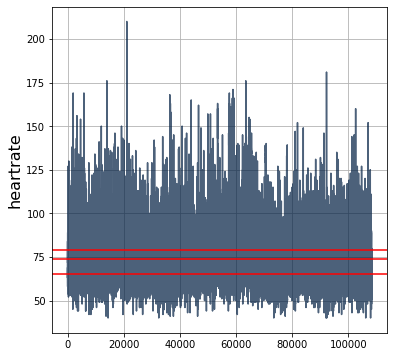

In [64]:
heartrate_female_54.select('heartrate').plot()
hrmean=heartrate_female_54[1].mean()
hr25=np.percentile(heartrate_female_54[1],25)
hr75=np.percentile(heartrate_female_54[1],75)
import matplotlib.pyplot as plt
plt.axhline(y=hrmean, color='r', linestyle='-')
plt.axhline(y=hr25, color='r', linestyle='-')
plt.axhline(y=hr75, color='r', linestyle='-')
plt.grid()
plt.show()

We see that the female data set is very solid between 50 and 100 heart beat samples. Make note that the graph is so solid because it is graphing over 100,000 samples. Let's compare this to a graph of our male data set. 

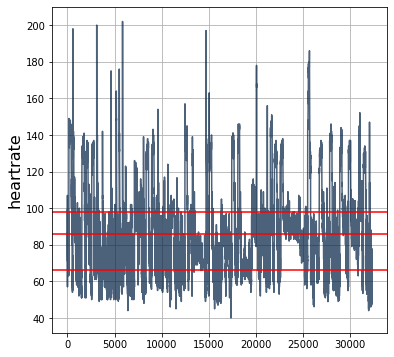

In [63]:
heartrate_male_60.select('heartrate').plot()
hrmean=heartrate_male_60[1].mean()
hr25=np.percentile(heartrate_male_60[1],25)
hr75=np.percentile(heartrate_male_60[1],75)
import matplotlib.pyplot as plt
plt.axhline(y=hrmean, color='r', linestyle='-')
plt.axhline(y=hr25, color='r', linestyle='-')
plt.axhline(y=hr75, color='r', linestyle='-')
plt.grid()
plt.show()

Notice that high incidence of spikes in the male's graph. This is due to his daily exercise session where his heart rate goes above 120. Now, let's generate a histogram to see how the frequency of heartrates from each data set is placed in bins.

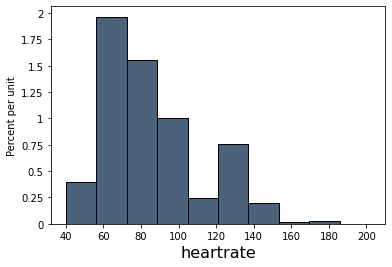

In [49]:
heartrate_male_60.select('heartrate').hist()

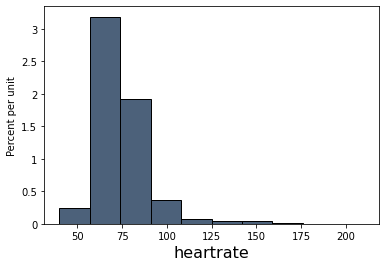

In [50]:
heartrate_female_54.select('heartrate').hist()

From the two historgrams, you can see the effects of the male exercising with larger bins of heart rates in the 100-140 range. The femaildata set has much smaller bins in this range.

This concludes this Jupyter Notebook analyzing two sets of heart rates collected from AppleWatches.

In [121]:
dir(Table)

['Row',
 'Rows',
 '_MutableMapping__marker',
 '__abstractmethods__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_add_column_and_format',
 '_as_label',
 '_as_labels',
 '_get_column',
 '_get_column_formatters',
 '_import_plotly',
 '_join',
 '_join_helper',
 '_multi_index',
 '_multiple_join',
 '_repr_html_',
 '_split_column_and_labels',
 '_unused_label',
 '_unused_label_in_either_table',
 '_use_html_if_available',
 '_varargs_as_labels',
 '_visu